In [1]:
import matplotlib.pyplot as plt
import csv
import random
import numpy as np

In [2]:
# generate dataset
with open('student.csv', 'w', newline='') as outfile:
    writer = csv.writer(outfile)
    writer.writerow(["StudentID", "Time", "Notes"])
    for i in range(1, 101):
        student_id = "'00" + str(i)
        if i < 10 :
            student_id = "'000" + str(i)
        time = random.randint(0,24)
        if time < 4 :
            note = time*10 + random.randint(0, 30)
        elif time < 8 :
            note = time*8 + random.randint(0, 20)
        elif time < 12 :
            note = time*6 + random.randint(0, 10)
        elif time < 16 :
            note = time*2 + 60 + random.randint(0, 10)
        else:
            note = 70 + time + random.randint(0, 5)
    
        writer.writerow([student_id, time, note])

In [3]:
# open file
time = []
note = []

with open('student.csv', 'r', newline='') as f:
    reader = csv.reader(f)
    rowNr = 0
    for row in reader:
        if rowNr >= 1:
            time.append(int(row[1]))
            note.append(int(row[2]))
            pass
        rowNr = rowNr + 1

x = np.array(time)
y = np.array(note)

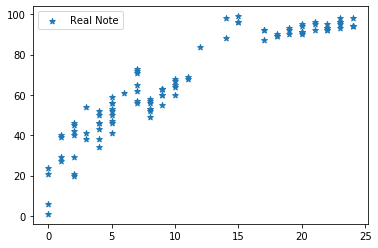

In [4]:
plt.scatter(x, y, marker='*', label='Real Note')
plt.legend(loc=2)
plt.draw()

In [5]:
x_mean = np.mean(x)
y_mean = np.mean(y)

In [6]:
num = 0
d = 0
for x_i, y_i in zip(x, y):
    num += (x_i - x_mean) * (y_i - y_mean)
    d += (x_i -x_mean)**2
a = num/d
b = y_mean -a * x_mean
print("a is: ", a)
print("b is: ", b)

a is:  2.9932380586994056
b is:  33.283569921350455


In [7]:
y_hat = a * x + b
error = (y - y_hat)**2/y.shape[0] 

In [8]:
# predict
# suppose a student's learning time is 10 hours, let's predict his note
x_test = 10
y_test = a * x_test + b
print("the note is: ", y_test)

the note is:  63.21595050834451


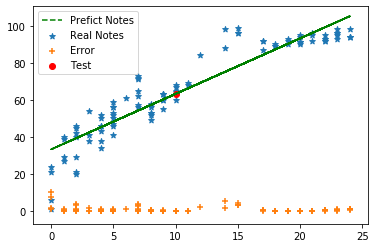

In [9]:
plt.scatter(x, y, marker='*', label='Real Notes')
plt.plot(x, y_hat, 'g--',label='Prefict Notes')
plt.scatter(x, error, marker="+", label='Error')
plt.scatter(x_test, y_test, color='r', label='Test')
plt.legend(loc=2)
plt.draw()